## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

# Reading the file and understanding the structure of data

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values' : df.isnull().sum(),
    'Unique Values': df.nunique().values,
    'Data Type': df.dtypes.values
})
df_summary

Column  \
id                                                          id   
name                                                      name   
host_id                                                host_id   
host_name                                            host_name   
neighbourhood_group                        neighbourhood_group   
neighbourhood                                    neighbourhood   
latitude                                              latitude   
longitude                                            longitude   
room_type                                            room_type   
price                                                    price   
minimum_nights                                  minimum_nights   
number_of_reviews                            number_of_reviews   
last_review                                        last_review   
reviews_per_month                            reviews_per_month   
calculated_host_listings_count  calculated_host_listings_count   
availability_365                              availability_365   

                                Missing Values  Unique Values Data Type  
id                                           0          48895     int64  
name                                        16          47905    object  
host_id                                      0          37457     int64  
host_name                                   21          11452    object  
neighbourhood_group                          0              5    object  
neighbourhood                                0            221    object  
latitude                                     0          19048   float64  
longitude                                    0          14718   float64  
room_type                                    0              3    object  
price                                        0            674     int64  
minimum_nights                               0            109     int64  
number_of_reviews                            0            394     int64  
last_review                              10052           1764    object  
reviews_per_month                        10052            937   float64  
calculated_host_listings_count               0             47     int64  
availability_365                             0            366     int64

In [7]:
df.describe()

id       host_id  latitude  longitude     price  \
count    48895.000     48895.000 48895.000  48895.000 48895.000   
mean  19017143.236  67620010.647    40.729    -73.952   152.721   
std   10983108.386  78610967.033     0.055      0.046   240.154   
min       2539.000      2438.000    40.500    -74.244     0.000   
25%    9471945.000   7822033.000    40.690    -73.983    69.000   
50%   19677284.000  30793816.000    40.723    -73.956   106.000   
75%   29152178.500 107434423.000    40.763    -73.936   175.000   
max   36487245.000 274321313.000    40.913    -73.713 10000.000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count       48895.000          48895.000          38843.000   
mean            7.030             23.274              1.373   
std            20.511             44.551              1.680   
min             1.000              0.000              0.010   
25%             1.000              1.000              0.190   
50%             3.000              5.000              0.720   
75%             5.000             24.000              2.020   
max          1250.000            629.000             58.500   

       calculated_host_listings_count  availability_365  
count                       48895.000         48895.000  
mean                            7.144           112.781  
std                            32.953           131.622  
min                             1.000             0.000  
25%                             1.000             0.000  
50%                             1.000            45.000  
75%                             2.000           227.000  
max                           327.000           365.000

In [8]:
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column Name', 'Missing Values']
missing_summary = missing_summary[missing_summary['Missing Values'] > 0] 
print(missing_summary)

          Column Name  Missing Values
1                name              16
3           host_name              21
12        last_review           10052
13  reviews_per_month           10052


In [9]:
# Splitting the categorical columns based on cardinality by keeping a threshold of 10 groups

categorical_columns = [col for col in df.columns if df[col].nunique()<10 and df[col].dtype=="O"]
cardinal_cat_columns = [col for col in df.columns if df[col].nunique()>=10 and df[col].dtype=="O"]

# Getting the list of numerical columns
num_columns = [col for col in df.columns if df[col].dtype!="O"]

# Understanding the different types of columns

print("--------------Basic Analysis--------------------")
print("Total no.of columns : ",len(df.columns))
print("Total no.of rows    : ",df.shape[0])
print("\n")

print("---------------Categorical columns with high cardinality--------------------")
print("No.of columns : ",len(cardinal_cat_columns))
print("Columns : ",cardinal_cat_columns)
print("\n")

print("---------------Categorical columns with low cardinality--------------------")
print("No.of columns : ",len(categorical_columns))
print("Columns : ",categorical_columns)
print("\n")

print("---------------Numerical columns--------------------")
print("No.of columns : ",len(num_columns))
print("Columns : ",num_columns)
print("\n")


--------------Basic Analysis--------------------
Total no.of columns :  16
Total no.of rows    :  48895


---------------Categorical columns with high cardinality--------------------
No.of columns :  4
Columns :  ['name', 'host_name', 'neighbourhood', 'last_review']


---------------Categorical columns with low cardinality--------------------
No.of columns :  2
Columns :  ['neighbourhood_group', 'room_type']


---------------Numerical columns--------------------
No.of columns :  10
Columns :  ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']




## Data Cleaning and Preprocessing

In [10]:
# Removing unnecessary columns

drop_columns_list = ["id" , "host_name", "last_review"] 
df.drop(drop_columns_list, axis=1, inplace=True)
df.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington    40.647    -73.972     Private room   
1           Manhattan       Midtown    40.754    -73.984  Entire home/apt   
2           Manhattan        Harlem    40.809    -73.942     Private room   
3            Brooklyn  Clinton Hill    40.685    -73.960  Entire home/apt   
4           Manhattan   East Harlem    40.799    -73.944  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9              0.210   
1    225               1                 45              0.380   
2    150               3                  0                NaN   
3     89               1                270              4.640   
4     80              10                  9              0.100   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

### Handling missing values

In [11]:
df["reviews_per_month"].head()

0   0.210
1   0.380
2     NaN
3   4.640
4   0.100
Name: reviews_per_month, dtype: float64

In [12]:
# using KNNImputer from sklearn:

imputer = KNNImputer(n_neighbors=5)
df["reviews_per_month"] = imputer.fit_transform(df[["reviews_per_month"]])
df["reviews_per_month"].head()

0   0.210
1   0.380
2   1.373
3   4.640
4   0.100
Name: reviews_per_month, dtype: float64

In [13]:
df["name"]=df["name"].fillna("Not Available")

In [14]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### After imputation our dataset doesnot have any missing value


In [15]:
df.duplicated().sum()

0

### There are no duplicate records

In [16]:
df.describe()

host_id  latitude  longitude     price  minimum_nights  \
count     48895.000 48895.000  48895.000 48895.000       48895.000   
mean   67620010.647    40.729    -73.952   152.721           7.030   
std    78610967.033     0.055      0.046   240.154          20.511   
min        2438.000    40.500    -74.244     0.000           1.000   
25%     7822033.000    40.690    -73.983    69.000           1.000   
50%    30793816.000    40.723    -73.956   106.000           3.000   
75%   107434423.000    40.763    -73.936   175.000           5.000   
max   274321313.000    40.913    -73.713 10000.000        1250.000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count          48895.000          48895.000                       48895.000   
mean              23.274              1.373                           7.144   
std               44.551              1.498                          32.953   
min                0.000              0.010                           1.000   
25%                1.000              0.280                           1.000   
50%                5.000              1.220                           1.000   
75%               24.000              1.580                           2.000   
max              629.000             58.500                         327.000   

       availability_365  
count         48895.000  
mean            112.781  
std             131.622  
min               0.000  
25%               0.000  
50%              45.000  
75%             227.000  
max             365.000

## Analyzing the price column

<Axes: xlabel='price', ylabel='Count'>

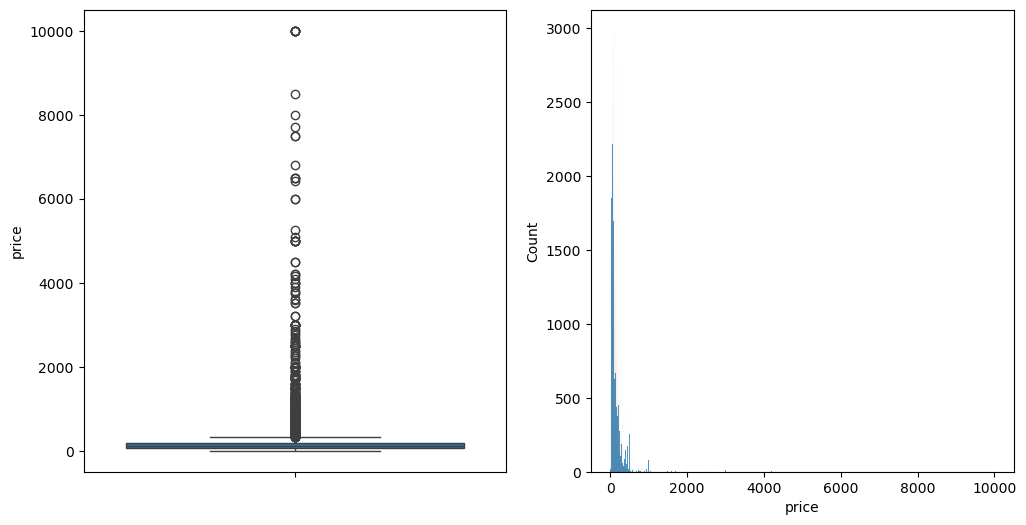

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df["price"])

plt.subplot(1,2,2)
sns.histplot(df["price"])

## The distribution of values in price column is highly skewed with a lot of outliers. 
- The reasons of outliers can be either because of some very expensive rooms or data entry error.
- The purpose of this project is just to make use of the data cleaning, mamipulation and visualization tools. 
- So to handle the outliers we keep the quartile values as threshold values instead of removing the outliers.
- For the analysis of this project we will use the original dataset.

In [18]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with upper bound
df_outliers = df['price'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)).reset_index()
df_outliers

index   price
0          0 149.000
1          1 225.000
2          2 150.000
3          3  89.000
4          4  80.000
...      ...     ...
48890  48890  70.000
48891  48891  40.000
48892  48892 115.000
48893  48893  55.000
48894  48894  90.000

[48895 rows x 2 columns]

### Analyzing the price column after handling outliers

<Axes: xlabel='price', ylabel='Count'>

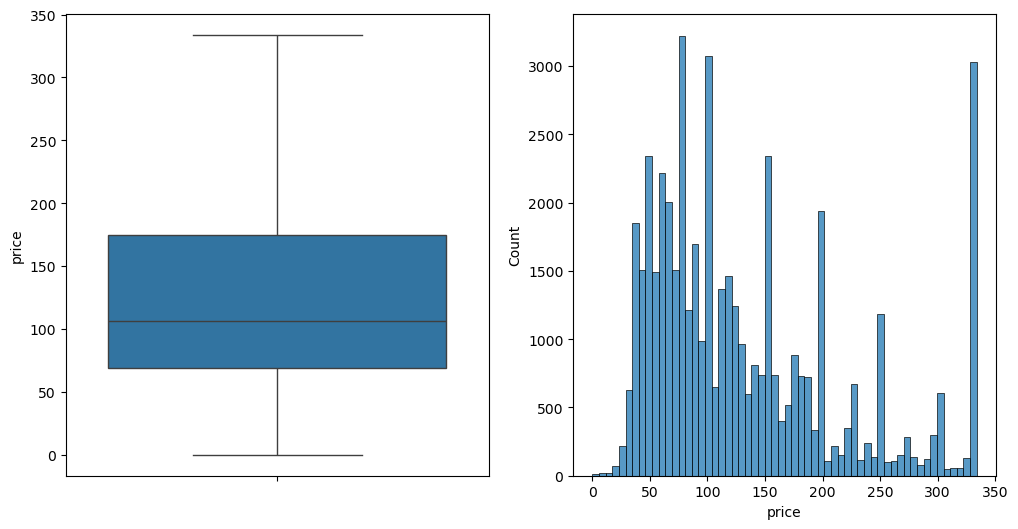

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df_outliers["price"])

plt.subplot(1,2,2)
sns.histplot(df_outliers["price"])

# Identifying the most expensive rooms

In [20]:
most_expensive_rooms = pd.DataFrame( df[df["price"]==df["price"].max()])
most_expensive_rooms

name   host_id  \
9151               Furnished room in Astoria apartment  20582832   
17692  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238                              1-BR Lincoln Center  72390391   

      neighbourhood_group    neighbourhood  latitude  longitude  \
9151               Queens          Astoria    40.768    -73.917   
17692            Brooklyn       Greenpoint    40.733    -73.957   
29238           Manhattan  Upper West Side    40.772    -73.987   

             room_type  price  minimum_nights  number_of_reviews  \
9151      Private room  10000             100                  2   
17692  Entire home/apt  10000               5                  5   
29238  Entire home/apt  10000              30                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151               0.040                               1                 0  
17692              0.160                               1                 0  
29238              1.373                               1                83

## Top Rooms with Highest price (10000)¶
- Furnished room in Astoria apartment (Astoria, Queens)
- Luxury 1 bedroom apt. -stunning Manhattan views (Greenpoint, Brooklyn)
- 1-BR Lincoln Center (Upper West Side ,Manhattan )

In [21]:
neighbourhood_price = df.groupby("neighbourhood_group")["price"].mean().reset_index(name="Average price")
neighbourhood_price

neighbourhood_group  Average price
0               Bronx         87.497
1            Brooklyn        124.383
2           Manhattan        196.876
3              Queens         99.518
4       Staten Island        114.812

In [22]:
room_type_price = df.groupby("room_type")["price"].mean().reset_index(name="Average price")
room_type_price

room_type  Average price
0  Entire home/apt        211.794
1     Private room         89.781
2      Shared room         70.128

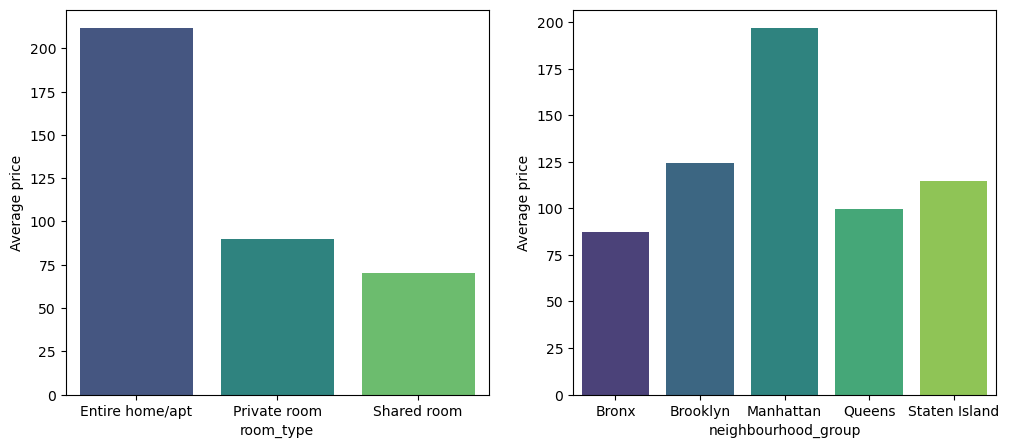

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(
    data=room_type_price, 
    x="room_type", 
    y="Average price",
    palette="viridis"
)
plt.subplot(1,2,2)
sns.barplot(
    data=neighbourhood_price, 
    x="neighbourhood_group", 
    y="Average price",
    palette="viridis"
)
plt.show()

## Average price on Room type and Neighbourhood Group
- Entire home/apt has the highest average price of 211.794
- Manhattan has the rooms with highest average price of 196.876 followed by Brooklyn with 124.383

## Identifying the top 3 neighbourhood in each group based on the no.of listings

In [24]:
top_3_neighbourhood = (df.groupby(["neighbourhood_group", "neighbourhood"]).size()
 .reset_index(name="no_of_listings")
 .sort_values("no_of_listings",ascending=False)
 .groupby("neighbourhood_group").head(3))
top_3_neighbourhood

neighbourhood_group       neighbourhood  no_of_listings
93             Brooklyn        Williamsburg            3920
50             Brooklyn  Bedford-Stuyvesant            3714
105           Manhattan              Harlem            2658
58             Brooklyn            Bushwick            2465
124           Manhattan     Upper West Side            1971
106           Manhattan      Hell's Kitchen            1958
128              Queens             Astoria             900
160              Queens    Long Island City             537
145              Queens            Flushing             426
18                Bronx         Kingsbridge              70
15                Bronx             Fordham              63
19                Bronx            Longwood              62
212       Staten Island          St. George              48
215       Staten Island       Tompkinsville              42
213       Staten Island           Stapleton              27

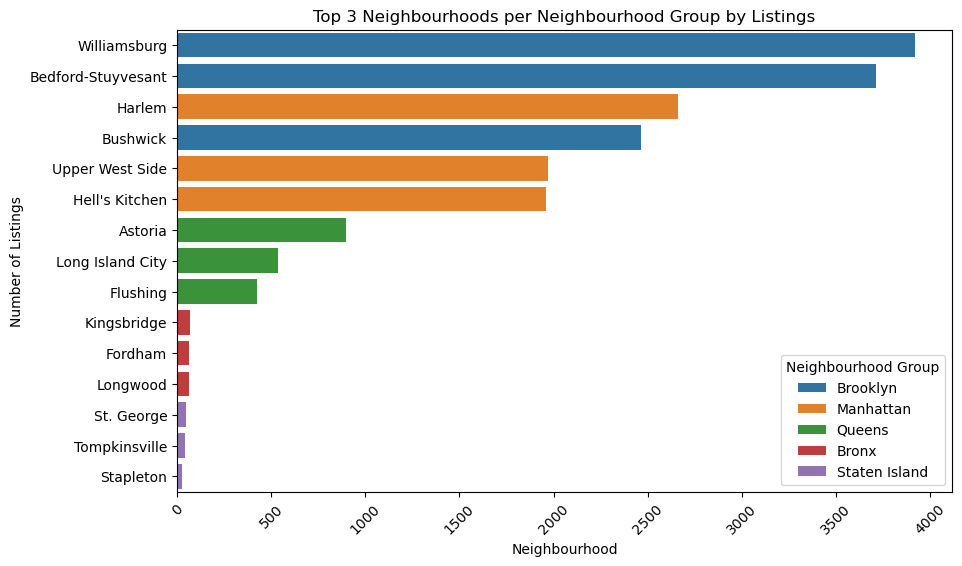

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_3_neighbourhood, 
    y="neighbourhood", 
    x="no_of_listings", 
    hue="neighbourhood_group"
)
plt.xticks(rotation=45)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.title("Top 3 Neighbourhoods per Neighbourhood Group by Listings")
plt.legend(title="Neighbourhood Group")
plt.show()

In [26]:
top_list = df.groupby("neighbourhood_group").size().reset_index(name="No_of_listings")
top_list

neighbourhood_group  No_of_listings
0               Bronx            1091
1            Brooklyn           20104
2           Manhattan           21661
3              Queens            5666
4       Staten Island             373

<Axes: xlabel='neighbourhood_group', ylabel='No_of_listings'>

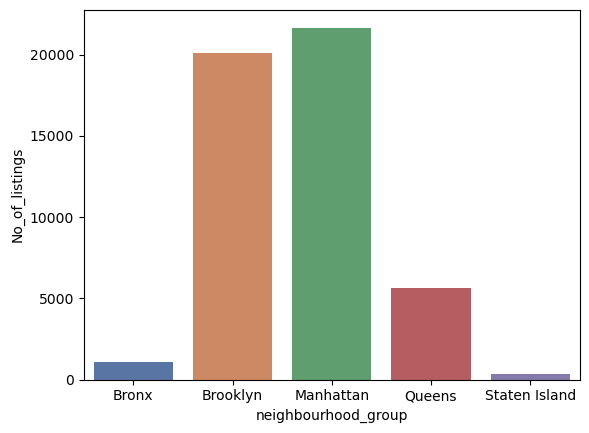

In [27]:
sns.barplot(x=top_list["neighbourhood_group"],y=top_list["No_of_listings"],palette = "deep" )

In [28]:
df.groupby("neighbourhood_group")["number_of_reviews"].sum()

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

In [29]:
df.groupby("neighbourhood_group")["minimum_nights"].agg([max,min,"mean","median"])

max  min  mean  median
neighbourhood_group                         
Bronx                 365    1 4.561   2.000
Brooklyn              999    1 6.057   3.000
Manhattan            1250    1 8.579   3.000
Queens                500    1 5.181   2.000
Staten Island         365    1 4.831   2.000

In [30]:
df.groupby("neighbourhood_group")["availability_365"].median()

neighbourhood_group
Bronx           148.000
Brooklyn         28.000
Manhattan        36.000
Queens           98.000
Staten Island   219.000
Name: availability_365, dtype: float64

## Top 3 neighbourhood in each neighbourhood group based on the no.of listings
- Williamsburg (Brooklyn) ,  Bedford-Stuyvesant	(Brooklyn) and Harlem (Manhattan) are the top 3 neighbourhoods with highest no.of listings as 3920,3714 and 2658 respectively.

## Top neighbourhood group based on the no.of listings
- 1. Manhattan - 21661 listings
  2. Brooklyn - 20104 listings
  3. Queens - 5666 listings
  4. Bronx - 1091 listings
  5. Staten Island 373 listings

## Other findings
- Highest no.of Reviews are received for Brooklyn and Manhattan has the second highest.
- Brooklyn and Manhattan has the highest no.of minimum nights to be spend.
- Staten island and Bronx has rooms available in most no.of days.

## Locating the properties on Map

In [31]:
Lat=0
Long=0
locations = list(zip(df.latitude, df.longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)

map1

In [32]:
from folium.plugins import HeatMap

heat_data = df[['latitude', 'longitude', 'price']].values.tolist()
map2 = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
HeatMap(heat_data).add_to(map2)

map2

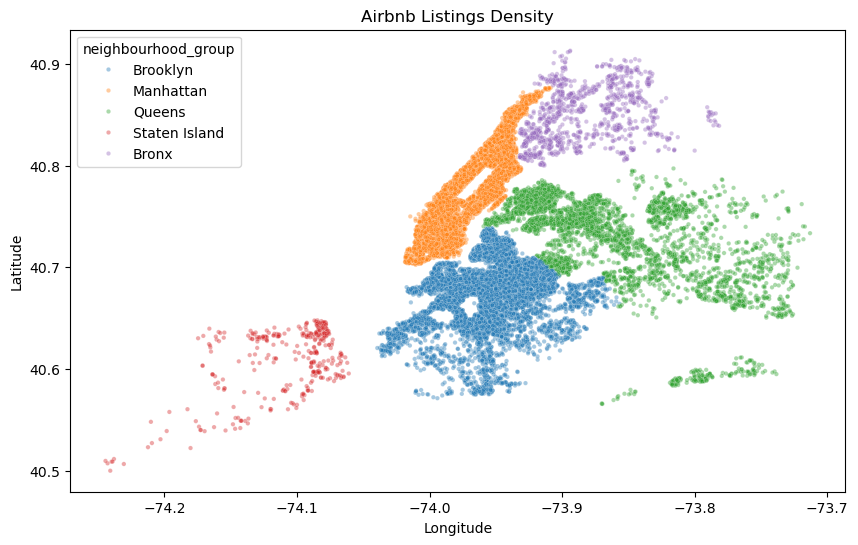

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude",hue="neighbourhood_group", alpha=0.4, s=10, color="red")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Airbnb Listings Density")
plt.show()

In [34]:
df.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington    40.647    -73.972     Private room   
1           Manhattan       Midtown    40.754    -73.984  Entire home/apt   
2           Manhattan        Harlem    40.809    -73.942     Private room   
3            Brooklyn  Clinton Hill    40.685    -73.960  Entire home/apt   
4           Manhattan   East Harlem    40.799    -73.944  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9              0.210   
1    225               1                 45              0.380   
2    150               3                  0              1.373   
3     89               1                270              4.640   
4     80              10                  9              0.100   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

# Identifying the top hosts

In [35]:
top_hosts = df["host_id"].value_counts().head(10)
top_hosts

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

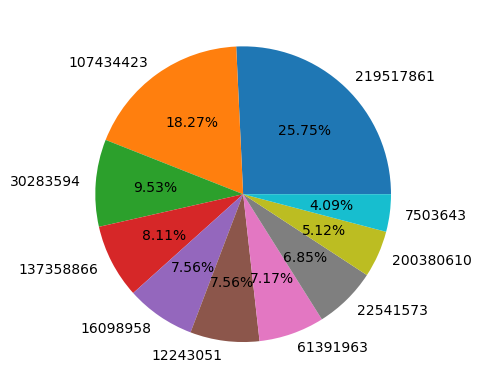

In [36]:
plt.pie(top_hosts.values, labels=top_hosts.index, autopct = "%1.2f%%")
plt.show()

## The top hosts
- 25.75% listings are from the host 219517861 being the top
- Host 107434423 has the second highest listings with 18.27%


# Analyzing the Room types

In [39]:
df["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

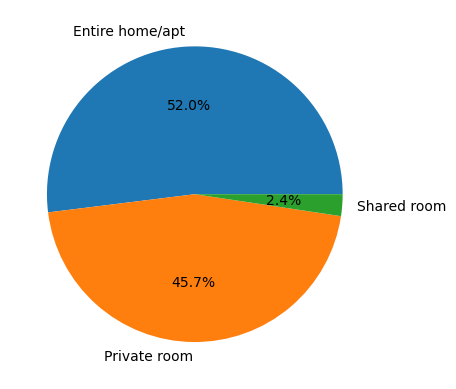

In [40]:
plt.pie(df["room_type"].value_counts().values,labels = df["room_type"].value_counts().index, autopct = "%1.1f%%")
plt.show()

In [41]:
df.groupby("room_type")["number_of_reviews"].sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [42]:
df.groupby("room_type")["minimum_nights"].agg([max,min,"mean"]) 

max  min  mean
room_type                       
Entire home/apt  1250    1 8.507
Private room      999    1 5.378
Shared room       999    1 6.475

In [43]:
df.groupby(["neighbourhood_group","room_type"]).size()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

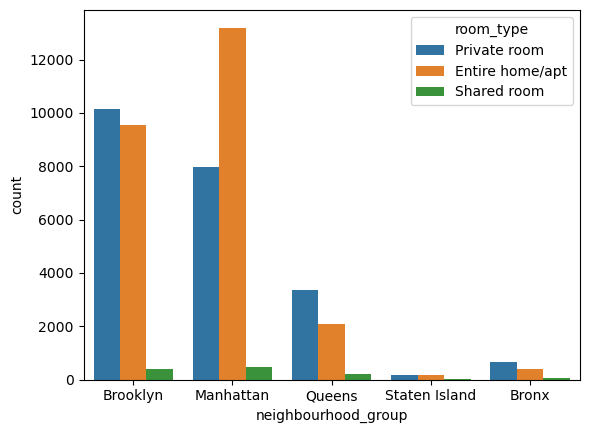

In [44]:
sns.countplot(x="neighbourhood_group",hue="room_type",data=df)

In [45]:
df.groupby(["neighbourhood_group","room_type"])["price"].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt   127.507
                     Private room       66.788
                     Shared room        59.800
Brooklyn             Entire home/apt   178.328
                     Private room       76.500
                     Shared room        50.528
Manhattan            Entire home/apt   249.239
                     Private room      116.777
                     Shared room        88.977
Queens               Entire home/apt   147.051
                     Private room       71.762
                     Shared room        69.020
Staten Island        Entire home/apt   173.847
                     Private room       62.293
                     Shared room        57.444
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

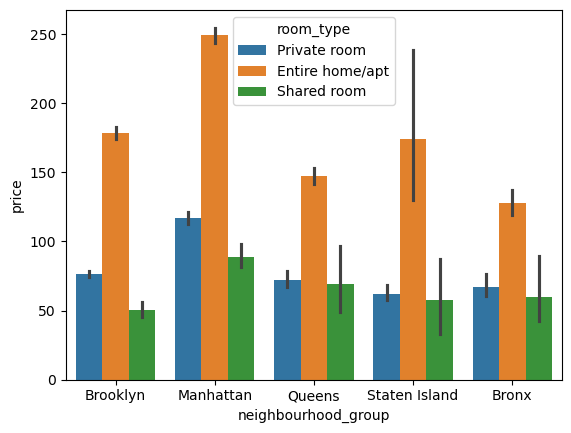

In [46]:
sns.barplot(x="neighbourhood_group",y="price",hue="room_type",data=df)

In [47]:
df.groupby("room_type")["availability_365"].agg([max,min,"mean","median"])

max  min    mean  median
room_type                                
Entire home/apt  365    0 111.920  42.000
Private room     365    0 111.204  45.000
Shared room      365    0 162.001  90.000

# Summary on the room types
- 52% of the total listings are "Entire home/Apt", and 45.7% private room.
- The highest no.of reviews are received for Entire home/Apt.
- The average stay in Entire home/apt should be of 9 days.
- The highest no.of Entire home and shared rooms is available in Manhattan, and private rooms in Brooklyn.
- Shared rooms are the most commonly available rooms.

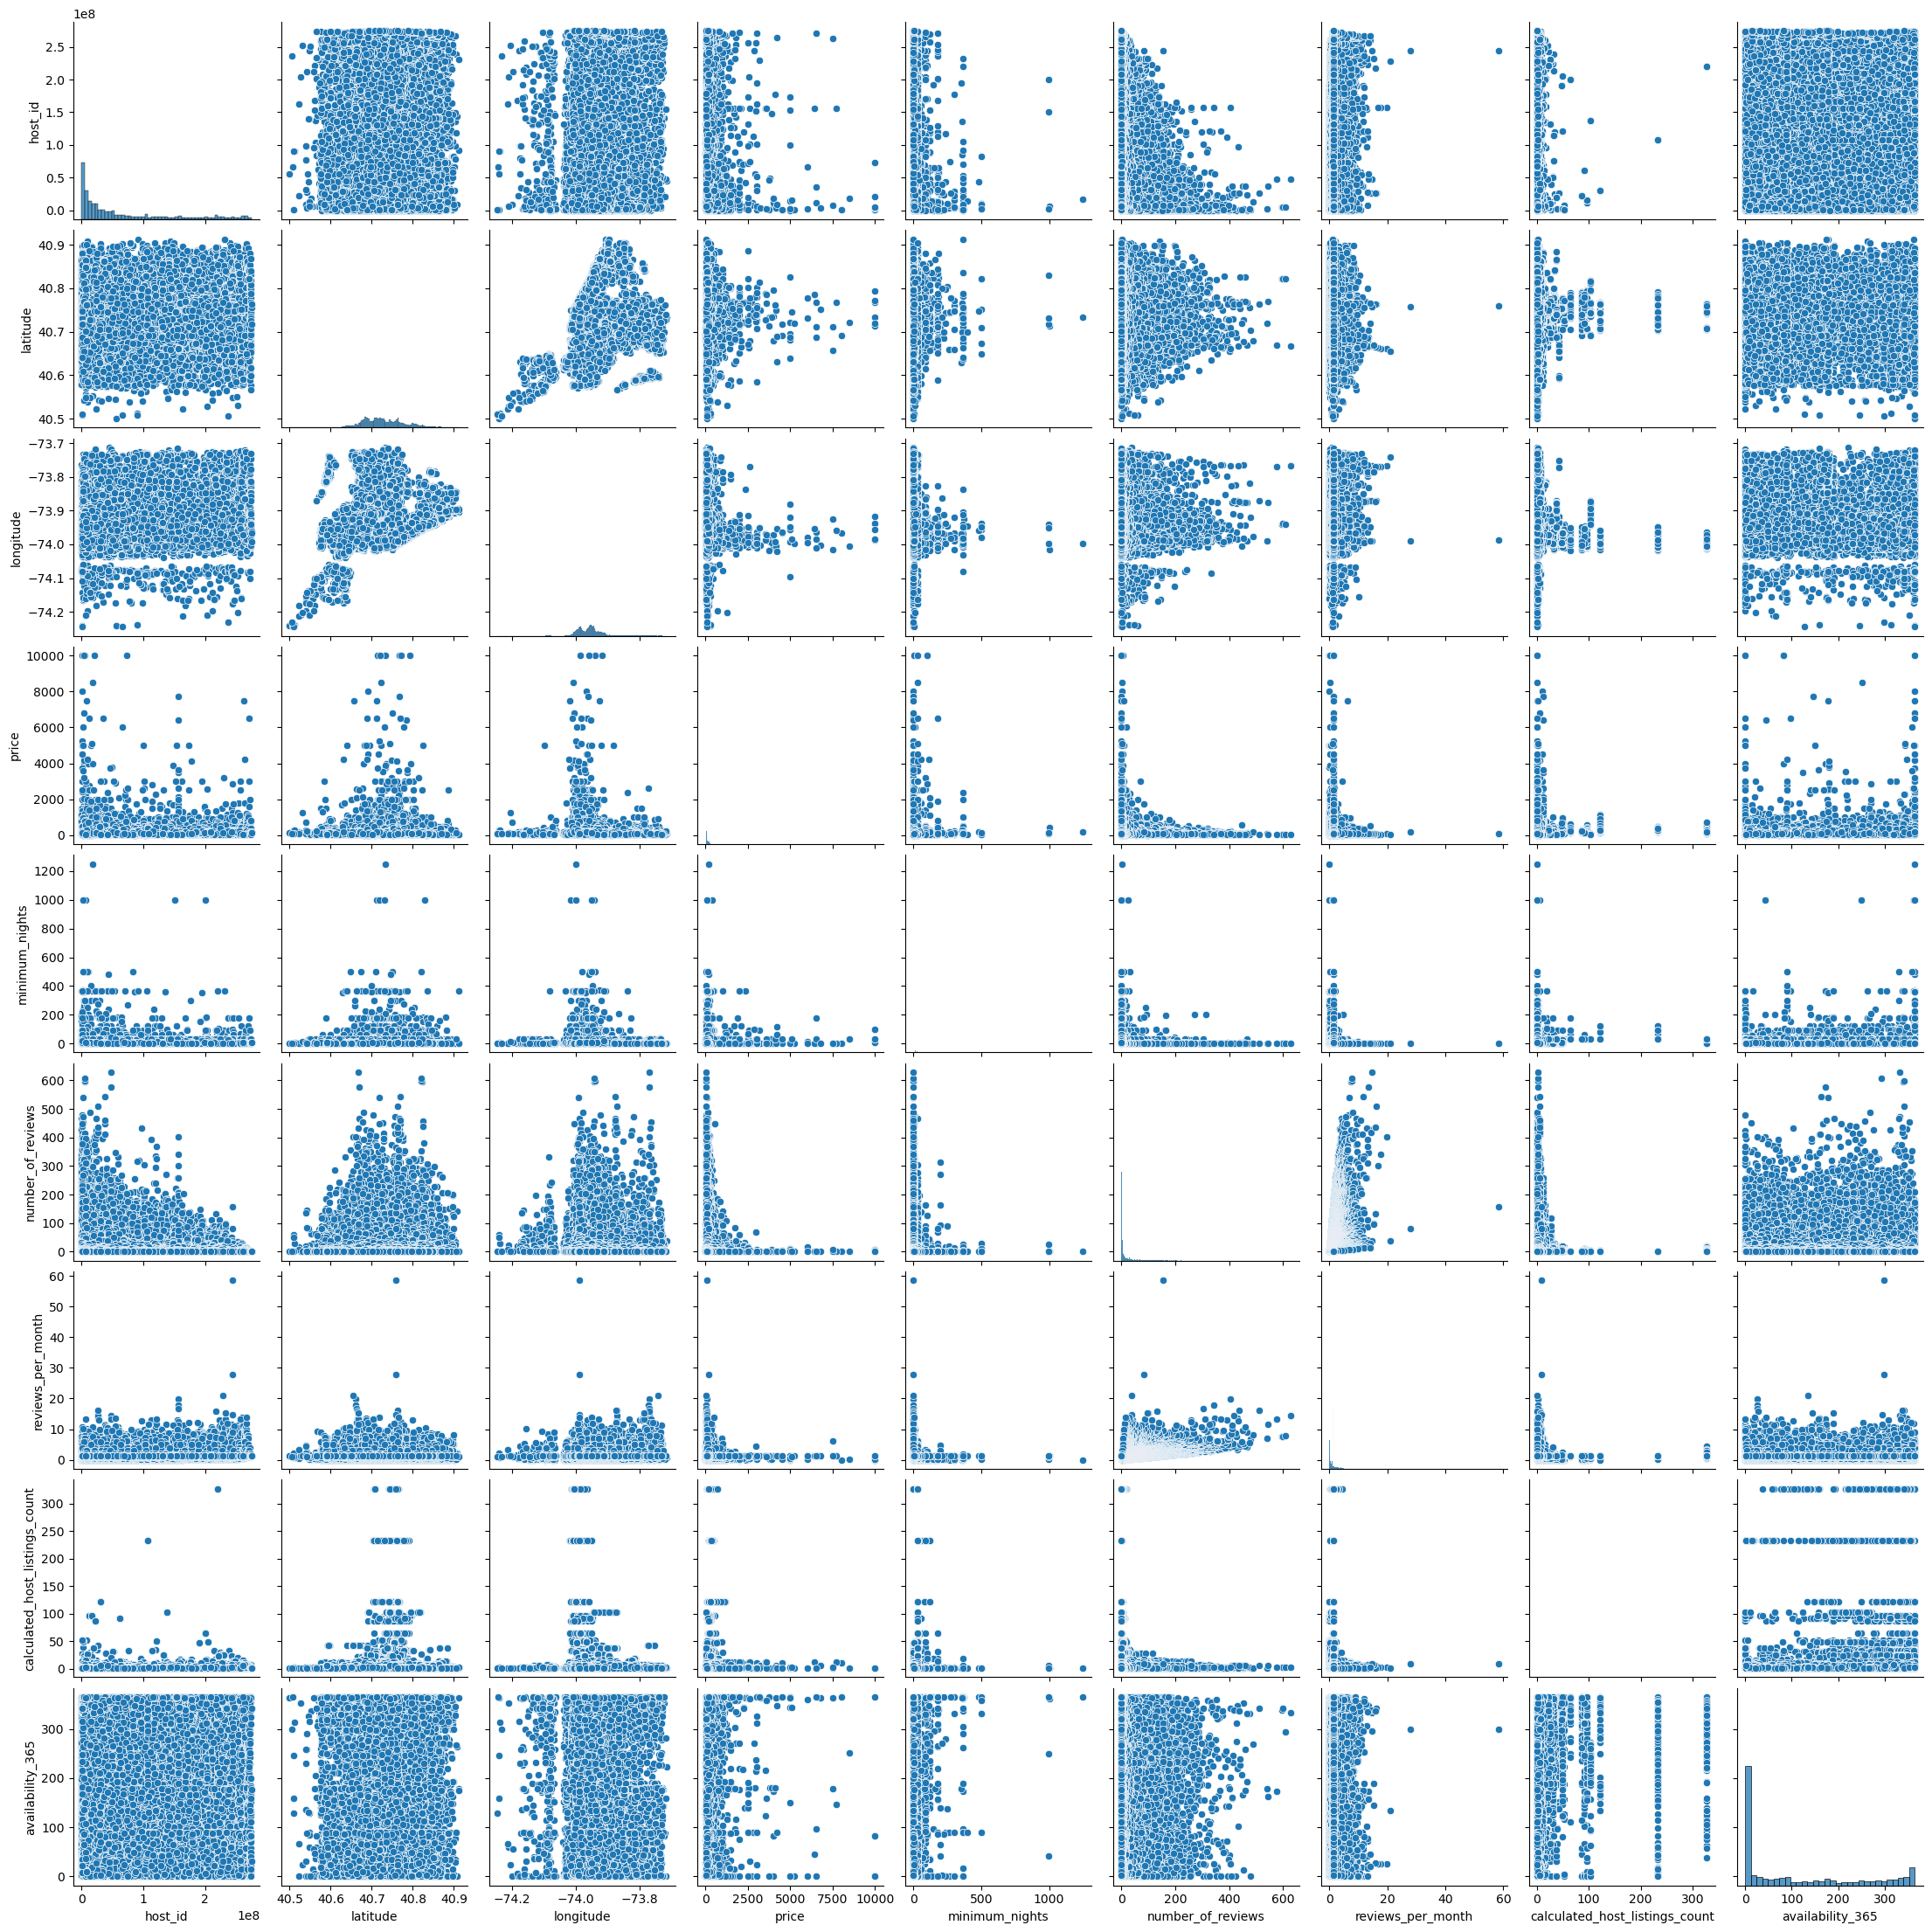

In [48]:
sns.pairplot(df)

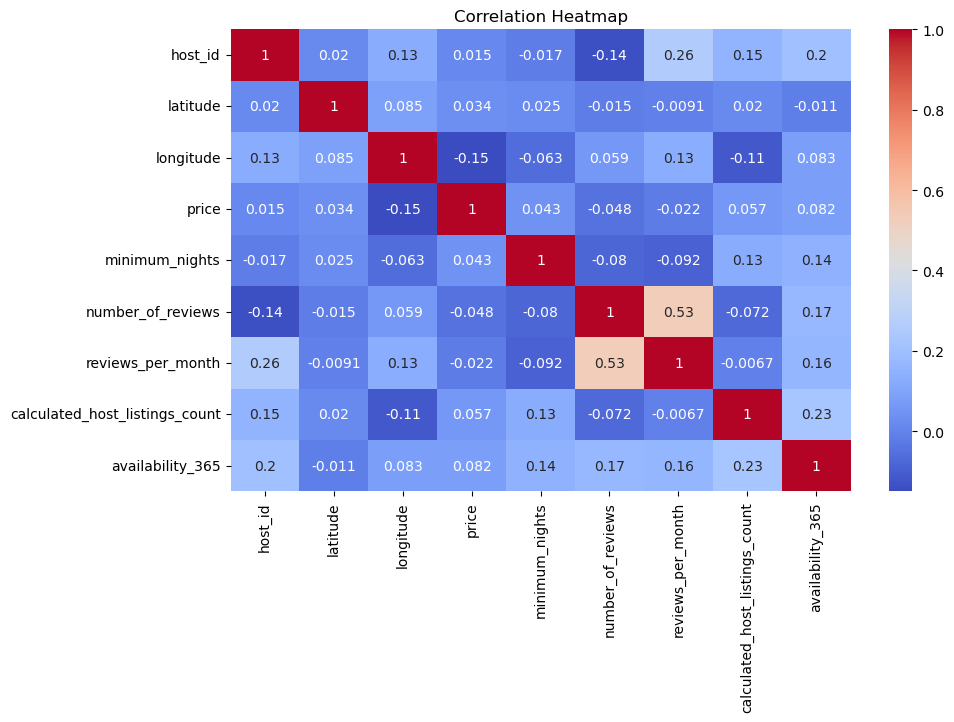

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## I would like to perform some additional Feature Engineering steps on this project like
- Creating new features
- feature transformation
- feature encoding

## Feature creation

In [50]:
df["price_per_night"] = df["price"] / df["minimum_nights"]
df["price_per_night"]

0       149.000
1       225.000
2        50.000
3        89.000
4         8.000
          ...  
48890    35.000
48891    10.000
48892    11.500
48893    55.000
48894    12.857
Name: price_per_night, Length: 48895, dtype: float64

In [51]:
df["price_category"] = pd.qcut(df["price"], q=4, labels=["Low", "Medium", "High", "Luxury"])
df.head(10)

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   
5         Large Cozy 1 BR Apartment In Midtown East     7322   
6                                   BlissArtsSpace!     7356   
7                  Large Furnished Room Near B'way      8967   
8                Cozy Clean Guest Room - Family Apt     7490   
9                Cute & Cozy Lower East Side 1 bdrm     7549   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn          Kensington    40.647    -73.972   
1           Manhattan             Midtown    40.754    -73.984   
2           Manhattan              Harlem    40.809    -73.942   
3            Brooklyn        Clinton Hill    40.685    -73.960   
4           Manhattan         East Harlem    40.799    -73.944   
5           Manhattan         Murray Hill    40.748    -73.975   
6            Brooklyn  Bedford-Stuyvesant    40.687    -73.956   
7           Manhattan      Hell's Kitchen    40.765    -73.985   
8           Manhattan     Upper West Side    40.802    -73.967   
9           Manhattan           Chinatown    40.713    -73.990   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   
5  Entire home/apt    200               3                 74   
6     Private room     60              45                 49   
7     Private room     79               2                430   
8     Private room     79               2                118   
9  Entire home/apt    150               1                160   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.210                               6               365   
1              0.380                               2               355   
2              1.373                               1               365   
3              4.640                               1               194   
4              0.100                               1                 0   
5              0.590                               1               129   
6              0.400                               1                 0   
7              3.470                               1               220   
8              0.990                               1                 0   
9              1.330                               4               188   

   price_per_night price_category  
0          149.000           High  
1          225.000         Luxury  
2           50.000           High  
3           89.000         Medium  
4            8.000         Medium  
5           66.667         Luxury  
6            1.333            Low  
7           39.500         Medium  
8           39.500         Medium  
9          150.000           High

# Feature transformation
- log transformation for "price" and "reviews_per_month" column as it is highly skewed.
- Standardaziation for "latitude", "longitude" and "availability_365",
- Min-Max Scaling for "minimum_nights" and "number_of_reviews"

In [52]:
skewed_features = ["price","reviews_per_month"]
for col in skewed_features:
    df[col] = np.log1p(df[col])  # log(1 + x) to avoid log(0)


In [53]:
standardize_cols = ["latitude", "longitude", "availability_365"]
scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])

In [54]:
minmax_scaler = MinMaxScaler()
df[["minimum_nights", "number_of_reviews"]] = minmax_scaler.fit_transform(df[["minimum_nights", "number_of_reviews"]])

# Feature Encoding
- Label encoding for "price category" as it has ordinal data
- One hot encoding for "room_type" and "neighbourhood_group" (nominal data)
- Target encoding for "neighbourhood" because of its high cardinality.

In [55]:
label_encoder = LabelEncoder()
df['price_category'] = label_encoder.fit_transform(df['price_category'])

In [56]:
df = pd.get_dummies(df, columns=["room_type", "neighbourhood_group"])

In [57]:
df['neighbourhood_encoded'] = df.groupby('neighbourhood')['price'].transform('mean')

In [58]:
df.head()

name  host_id neighbourhood  \
0                Clean & quiet apt home by the park     2787    Kensington   
1                             Skylit Midtown Castle     2845       Midtown   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632        Harlem   
3                   Cozy Entire Floor of Brownstone     4869  Clinton Hill   
4  Entire Apt: Spacious Studio/Loft by central park     7192   East Harlem   

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0    -1.494     -0.438  5.011           0.000              0.014   
1     0.452     -0.685  5.421           0.000              0.072   
2     1.468      0.222  5.017           0.002              0.000   
3    -0.803     -0.164  4.500           0.000              0.429   
4     1.276      0.177  4.394           0.007              0.014   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.191                               6             1.916   
1              0.322                               2             1.840   
2              0.864                               1             1.916   
3              1.730                               1             0.617   
4              0.095                               1            -0.857   

   price_per_night  price_category  room_type_Entire home/apt  \
0          149.000               0                      False   
1          225.000               2                       True   
2           50.000               0                      False   
3           89.000               3                       True   
4            8.000               3                       True   

   room_type_Private room  room_type_Shared room  neighbourhood_group_Bronx  \
0                    True                  False                      False   
1                   False                  False                      False   
2                    True                  False                      False   
3                   False                  False                      False   
4                   False                  False                      False   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                          True                          False   
1                         False                           True   
2                         False                           True   
3                          True                          False   
4                         False                           True   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                       False                              False   
1                       False                              False   
2                       False                              False   
3                       False                              False   
4                       False                              False   

   neighbourhood_encoded  
0                  4.348  
1                  5.422  
2                  4.571  
3                  4.827  
4                  4.659

# Feature Selection
- here i am going with correlation -based feature selection.

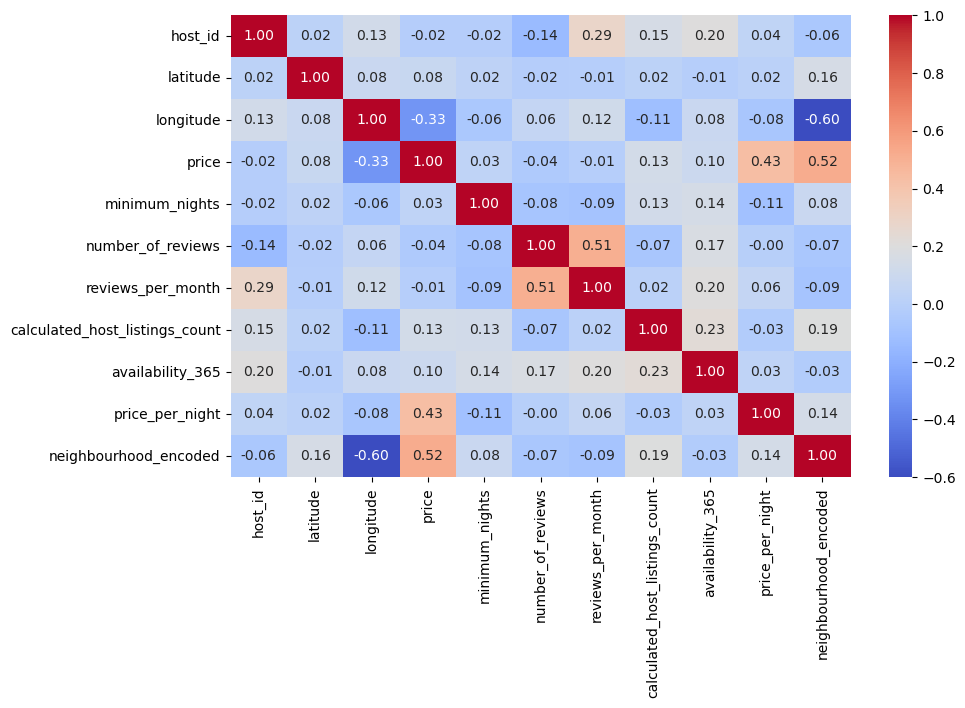

In [59]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



In [60]:
# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Set a threshold for removing highly correlated features
threshold = 0.9

# Find the upper triangle of the correlation matrix (to avoid redundant checks)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns that have a correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]

# Drop the highly correlated features
df_selected = df.drop(columns=to_drop)

print(f"Removed columns: {to_drop}")


Removed columns: []


In [61]:
df.head()

name  host_id neighbourhood  \
0                Clean & quiet apt home by the park     2787    Kensington   
1                             Skylit Midtown Castle     2845       Midtown   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632        Harlem   
3                   Cozy Entire Floor of Brownstone     4869  Clinton Hill   
4  Entire Apt: Spacious Studio/Loft by central park     7192   East Harlem   

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0    -1.494     -0.438  5.011           0.000              0.014   
1     0.452     -0.685  5.421           0.000              0.072   
2     1.468      0.222  5.017           0.002              0.000   
3    -0.803     -0.164  4.500           0.000              0.429   
4     1.276      0.177  4.394           0.007              0.014   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.191                               6             1.916   
1              0.322                               2             1.840   
2              0.864                               1             1.916   
3              1.730                               1             0.617   
4              0.095                               1            -0.857   

   price_per_night  price_category  room_type_Entire home/apt  \
0          149.000               0                      False   
1          225.000               2                       True   
2           50.000               0                      False   
3           89.000               3                       True   
4            8.000               3                       True   

   room_type_Private room  room_type_Shared room  neighbourhood_group_Bronx  \
0                    True                  False                      False   
1                   False                  False                      False   
2                    True                  False                      False   
3                   False                  False                      False   
4                   False                  False                      False   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                          True                          False   
1                         False                           True   
2                         False                           True   
3                          True                          False   
4                         False                           True   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                       False                              False   
1                       False                              False   
2                       False                              False   
3                       False                              False   
4                       False                              False   

   neighbourhood_encoded  
0                  4.348  
1                  5.422  
2                  4.571  
3                  4.827  
4                  4.659

In [62]:
df.head()

name  host_id neighbourhood  \
0                Clean & quiet apt home by the park     2787    Kensington   
1                             Skylit Midtown Castle     2845       Midtown   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632        Harlem   
3                   Cozy Entire Floor of Brownstone     4869  Clinton Hill   
4  Entire Apt: Spacious Studio/Loft by central park     7192   East Harlem   

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0    -1.494     -0.438  5.011           0.000              0.014   
1     0.452     -0.685  5.421           0.000              0.072   
2     1.468      0.222  5.017           0.002              0.000   
3    -0.803     -0.164  4.500           0.000              0.429   
4     1.276      0.177  4.394           0.007              0.014   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.191                               6             1.916   
1              0.322                               2             1.840   
2              0.864                               1             1.916   
3              1.730                               1             0.617   
4              0.095                               1            -0.857   

   price_per_night  price_category  room_type_Entire home/apt  \
0          149.000               0                      False   
1          225.000               2                       True   
2           50.000               0                      False   
3           89.000               3                       True   
4            8.000               3                       True   

   room_type_Private room  room_type_Shared room  neighbourhood_group_Bronx  \
0                    True                  False                      False   
1                   False                  False                      False   
2                    True                  False                      False   
3                   False                  False                      False   
4                   False                  False                      False   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                          True                          False   
1                         False                           True   
2                         False                           True   
3                          True                          False   
4                         False                           True   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                       False                              False   
1                       False                              False   
2                       False                              False   
3                       False                              False   
4                       False                              False   

   neighbourhood_encoded  
0                  4.348  
1                  5.422  
2                  4.571  
3                  4.827  
4                  4.659

In [65]:
df_final = df.drop(columns=["price", "latitude", "longitude"]) 


# Save processed dataset
df_final.to_csv("processed_dataset.csv", index=False)
print("We are done with Feature engineering and our data is ready for model training")


We are done with Feature engineering and our data is ready for model training
